In [121]:
import os.path

import tensorflow as tf
import numpy as np
import pandas as pd
from helpers import scaling,scaling_reverse, RSquaredSeparated
import h5py
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from tensorflow.keras.utils import Progbar


In [2]:
#dataset = "../run3_dataset_10000_test.h5"
dataset = "../run_3_casecorr_10000.h5"
input_df = pd.read_hdf(dataset,key="input")
output_df = pd.read_hdf(dataset,key="output")


In [3]:
for i in range(115):
    print(input_df.columns[i], input_df.columns[i+115])

START_ARS01_MCOX_0740 START_ARS01_MCOY_0750
START_ARS01_MCOX_1090 START_ARS01_MCOY_1110
START_ARS01_MCOX_1470 START_ARS01_MCOY_1490
START_ARS01_MCOX_1910 START_ARS01_MCOY_1930
START_ARS01_MCOX_2420 START_ARS01_MCOY_2430
START_ARS01_MCOX_2920 START_ARS01_MCOY_2930
START_ARS01_MCOX_4230 START_ARS01_MCOY_4240
START_ARS01_MCOX_4730 START_ARS01_MCOY_4740
START_ARS01_MCOX_5260 START_ARS01_MCOY_5270
START_ARS01_MCOX_5890 START_ARS01_MCOY_5900
START_ARS02_MCOX_1090 START_ARS02_MCOY_1110
START_ARS02_MCOX_1470 START_ARS02_MCOY_1490
START_ARS02_MCOX_1910 START_ARS02_MCOY_1930
START_ARS02_MCOX_2420 START_ARS02_MCOY_2430
START_ARS02_MCOX_2920 START_ARS02_MCOY_2930
START_ARS02_MCOX_4230 START_ARS02_MCOY_4240
START_ARS02_MCOX_4730 START_ARS02_MCOY_4740
START_ARS02_MCOX_5260 START_ARS02_MCOY_5270
START_ARS02_MCOX_5890 START_ARS02_MCOY_5900
START_ARS03_MCOX_0820 START_ARS03_MCOY_0830
START_ARS03_MCOX_1090 START_ARS03_MCOY_1110
START_ARS03_MCOX_1470 START_ARS03_MCOY_1490
START_ARS03_MCOX_1910 START_ARS0

In [4]:
input_df.head()

START_ARS01_MCOX_0740  START_ARS01_MCOX_1090  START_ARS01_MCOX_1470  \
221               -0.310704              -0.238039               0.332268   
7693              -0.311870              -0.240101               0.331322   
8952              -0.310481              -0.238108               0.332472   
3662              -0.310296              -0.238976               0.331304   
8593              -0.311899              -0.238141               0.331190   

      START_ARS01_MCOX_1910  START_ARS01_MCOX_2420  START_ARS01_MCOX_2920  \
221                0.051627               0.438250               0.431774   
7693               0.051660               0.438256               0.431781   
8952               0.051642               0.438281               0.431804   
3662               0.051671               0.438269               0.431792   
8593               0.051616               0.438185               0.431711   

      START_ARS01_MCOX_4230  START_ARS01_MCOX_4730  START_ARS01_MCOX_5260  \
221                0.434380               0.434290               0.170505   
7693               0.434388               0.434298               0.170583   
8952               0.434409               0.434321               0.170157   
3662               0.434397               0.434310               0.169482   
8593               0.434318               0.434228               0.170424   

      START_ARS01_MCOX_5890  ...  ARS12_DBPM_1080_Y  ARS12_DBPM_1460_Y  \
221                0.357994  ...          -0.009615          -0.017061   
7693               0.358818  ...           0.001011          -0.004337   
8952               0.351363  ...           0.009235           0.006023   
3662               0.352047  ...          -0.007995          -0.001821   
8593               0.355049  ...           0.004618           0.003536   

      ARS12_DBPM_1900_Y  ARS12_DBPM_2410_Y  ARS12_DBPM_2910_Y  \
221           -0.011942          -0.007543           0.001420   
7693          -0.005686          -0.007114          -0.003805   
8952          -0.000161          -0.005933          -0.007319   
3662           0.004436           0.010449           0.009094   
8593           0.000116          -0.003105          -0.003945   

      ARS12_DBPM_4220_Y  ARS12_DBPM_4720_Y  ARS12_DBPM_5250_Y  \
221            0.009268           0.009983           0.006354   
7693           0.002496           0.006834           0.008905   
8952          -0.003036           0.003572           0.009768   
3662           0.000677          -0.008200          -0.015051   
8593          -0.001794           0.001767           0.005175   

      ARS12_DBPM_5880_Y  ARS01_DBPM_0390_Y  
221           -0.001816          -0.021849  
7693           0.004515          -0.010918  
8952           0.009486           0.005152  
3662          -0.011792          -0.000620  
8593           0.004876           0.003433  

[5 rows x 460 columns]

In [5]:
output_df.head()

ARS01_MCOX_0740  ARS01_MCOX_1090  ARS01_MCOX_1470  ARS01_MCOX_1910  \
221         -0.310036        -0.240809         0.329966         0.051713   
7693        -0.309431        -0.237995         0.332230         0.051635   
8952        -0.312006        -0.242109         0.328509         0.051751   
3662        -0.311358        -0.242568         0.329223         0.051719   
8593        -0.310791        -0.239769         0.331240         0.051622   

      ARS01_MCOX_2420  ARS01_MCOX_2920  ARS01_MCOX_4230  ARS01_MCOX_4730  \
221          0.438272         0.431797         0.434403         0.434315   
7693         0.438259         0.431780         0.434384         0.434296   
8952         0.438262         0.431789         0.434395         0.434305   
3662         0.438249         0.431776         0.434381         0.434291   
8593         0.438198         0.431723         0.434328         0.434237   

      ARS01_MCOX_5260  ARS01_MCOX_5890  ...  ARS12_MCOY_1110  ARS12_MCOY_1490  \
221          0.170335         0.352095  ...        -0.636419        -0.327170   
7693         0.169989         0.354142  ...        -0.619375        -0.326705   
8952         0.170466         0.357751  ...        -0.628015        -0.326986   
3662         0.170405         0.356333  ...        -0.621742        -0.329907   
8593         0.170080         0.353395  ...        -0.622163        -0.327306   

      ARS12_MCOY_1930  ARS12_MCOY_2430  ARS12_MCOY_2930  ARS12_MCOY_4240  \
221          0.037840        -0.444932        -0.489553        -0.486589   
7693         0.037813        -0.444931        -0.489554        -0.486587   
8952         0.037830        -0.444931        -0.489553        -0.486590   
3662         0.037989        -0.444940        -0.489553        -0.486590   
8593         0.037849        -0.444932        -0.489554        -0.486589   

      ARS12_MCOY_4740  ARS12_MCOY_5270  ARS12_MCOY_5900  ARS01_MCOY_0400  
221         -0.226254        -0.326892         0.004558        -0.132388  
7693        -0.226252        -0.325923         0.005851        -0.133336  
8952        -0.226255        -0.328204         0.005848        -0.132386  
3662        -0.226255        -0.324888         0.012747        -0.133021  
8593        -0.226254        -0.324055         0.006855        -0.131711  

[5 rows x 230 columns]

In [22]:
input_main =  input_df.values
output = output_df.values

In [192]:
#path = ("/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-142337/")
path = ("/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-152207/")
path = ("/home/guney/PycharmProjects/Summerproject/out/out/2024-07-29-174112/")
paths = [path + i +"/" for i in os.listdir(path) if not i.split(".")[-1] == "h5"]

In [193]:
print(paths)

['/home/guney/PycharmProjects/Summerproject/out/out/2024-07-29-174112/2_460_0.0005_1e-08_0.1_-1/']


In [194]:

# Path to your HDF5 file
file_path = path + "Limits_scale.h5"
orbit_min =None
orbit_max = None
corr_min = None
corr_max = None
# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as hdf:
    orbit_min = np.array(hdf['orbit_min'])
    orbit_max = np.array(hdf['orbit_max'])
    corr_min = np.array(hdf['corr_min'])
    corr_max = np.array(hdf['corr_max'])
    
print(orbit_min.mean(), orbit_max.mean(),corr_max.mean(),corr_min.mean())

-0.23089906427200765 0.22432233417145978 -0.03136902333300384 -0.0377770459213349


In [195]:
print(orbit_max)

[0.         0.         0.33330912 0.05184007 0.43839701 0.43192167
 0.43452888 0.43443929 0.17083656 0.36038552 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.33560035 0.         0.15493488
 0.15008946 0.15241943 0.14346491 0.         0.15513777 0.
 0.05764603 0.         0.         0.         0.         0.
 0.         0.         0.30736841 0.         0.47113641 0.29695942
 0.61452693 0.60493517 0.60739188 0.61751161 0.3932301  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.14342629
 0.         0.24594951 0.24097187 0.2433248  0.23919724 0.
 0.         0.73190297 0.84511758 1.39050255 1.60298511 1.57910191
 1.58132014 1.62946683 1.57121443 0.64805034 0.14510081 0.07090111
 0.45151839 0.07197641 0.44771694 0.44321637 0.44597012 0.44414308
 0.27043393 0.45741269 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.4

In [196]:
input = scaling(input_main,orbit_min,orbit_max,0,1)


In [197]:
#normalization = tf.keras.layers.Normalization()
#normalization.adapt(input1.values)
#input1 = normalization(input1)
print(input.shape)

(10100, 460)


In [198]:
hists = []
important_paths = []
print(paths)
for i in paths[:]:
    #print(i)
    hist_path = f"/{i}/Data_simulation.h5"
    with h5py.File(hist_path, 'r') as hdf:
        loss = hdf['loss'][:]
        val_loss = hdf['val_loss'][:]
        label = i.split("/")[-2]
        print(val_loss[-1])
        if val_loss[-1] < 0.1:
            hists.append({"loss": loss, "val_loss": val_loss, "label": label,"path":i,"score": val_loss[-1]})
            #important_paths.append(i)
print(hists)

['/home/guney/PycharmProjects/Summerproject/out/out/2024-07-29-174112/2_460_0.0005_1e-08_0.1_-1/']
0.003013234750770313
[{'loss': array([0.08770623, 0.05548643, 0.04975645, ..., 0.00342569, 0.0034308 ,
       0.00342808]), 'val_loss': array([0.39131   , 0.11354708, 0.05994607, ..., 0.00304161, 0.00301947,
       0.00301323]), 'label': '2_460_0.0005_1e-08_0.1_-1', 'path': '/home/guney/PycharmProjects/Summerproject/out/out/2024-07-29-174112/2_460_0.0005_1e-08_0.1_-1/', 'score': 0.003013234750770313}]


In [199]:
sorted_hists = sorted(hists, key=lambda hist: hist["score"])

In [200]:
print(len(sorted_hists))
print(sorted_hists[0]["score"])

1
0.003013234750770313


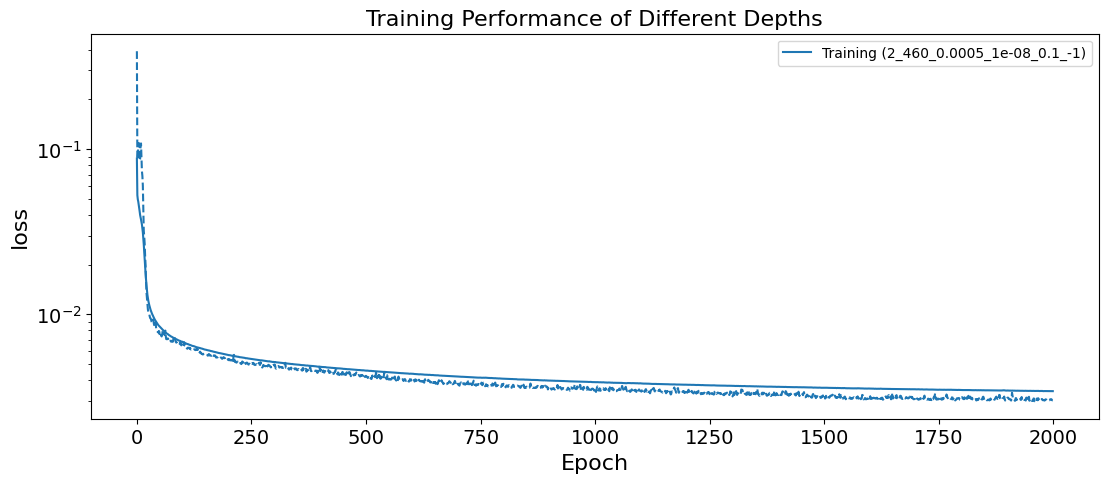

In [201]:

params = {'axes.labelsize': 16,
          'axes.titlesize': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,}
plt.rcParams.update(params)
fig,ax = plt.subplots(1,figsize=(13,5))
ax = [ax]
colors = plt.get_cmap('tab10').colors
for i, data in enumerate(sorted_hists[:10]):
    color = colors[i]
    loss = data['loss']
    loss = savgol_filter(loss,2,1)
    val_loss = data['val_loss']
    val_loss = savgol_filter(val_loss,2,1)
    label = data['label']
    ax[0].plot(loss,label=f"Training ({label})",color = color)
    ax[0].plot(val_loss,linestyle='--',color = color) 
for axi in ax:
    axi.set_yscale('log')
    axi.legend(ncol =2)
    #axi.set_ylim(1e-3,2e-2)
    #axi.set_xlim(0,100)
    axi.set_xlabel("Epoch")
    axi.set_ylabel("loss")
    axi.set_title("Training Performance of Different Depths")
#fig.savefig("figures/test_tune_80/loss_vs_epochs.png")

In [202]:
results = []
pg = Progbar(min(len(sorted_hists),10))
for i in sorted_hists[:10]:
    model_path = f"/{i['path']}/my_model_try.keras"
    model = tf.keras.models.load_model(model_path)
    #print(model.summary())
    inference =model.predict(input,verbose=0)
    inference = scaling_reverse(inference,corr_min,corr_max,0,1)
    #print(np.mean((inference-output)**2,axis=0))
    #value = (np.mean(np.abs(inference-output))/np.mean(np.abs(output))*100)
    #print(np.mean((inference-output)**2))
    value = (np.mean(np.abs(inference-output)))
    data=np.mean(np.abs(inference-output),axis=0)
    results.append({'value':value, 'label':i['label'],'data':data})
    pg.add(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


In [203]:
np.mean(output,axis=0)

array([-0.31104723, -0.23991707,  0.33056541,  0.05167115,  0.43823829,
        0.43176413,  0.4343702 ,  0.43428046,  0.16999545,  0.35249377,
       -1.60510889, -0.22704098, -1.05849652, -0.55562001, -0.55163385,
       -0.54969998, -0.58536818, -0.87840408, -0.30973286, -0.15162695,
       -0.06119156,  0.33290011, -0.27501312,  0.15477622,  0.14993386,
        0.15226403,  0.14330633, -0.08491846,  0.14429567, -0.09521167,
        0.04915918, -1.08459238, -0.56324327, -0.56028097, -0.55844885,
       -0.59392467, -0.92233488, -0.65239819,  0.30549026, -0.24756776,
        0.46954813,  0.29683377,  0.61436815,  0.60478164,  0.60723662,
        0.6173534 ,  0.39240099, -0.47108652, -0.73680235, -0.23358651,
       -1.24116962, -0.75292378, -0.74517779, -0.74333667, -0.78613925,
       -1.09287071, -0.48151101, -0.47964542, -0.45281007,  0.14019033,
       -0.12131858,  0.24579164,  0.24081632,  0.24316981,  0.23903864,
       -0.03396551, -0.48393927,  0.72303931,  0.84143212,  1.39

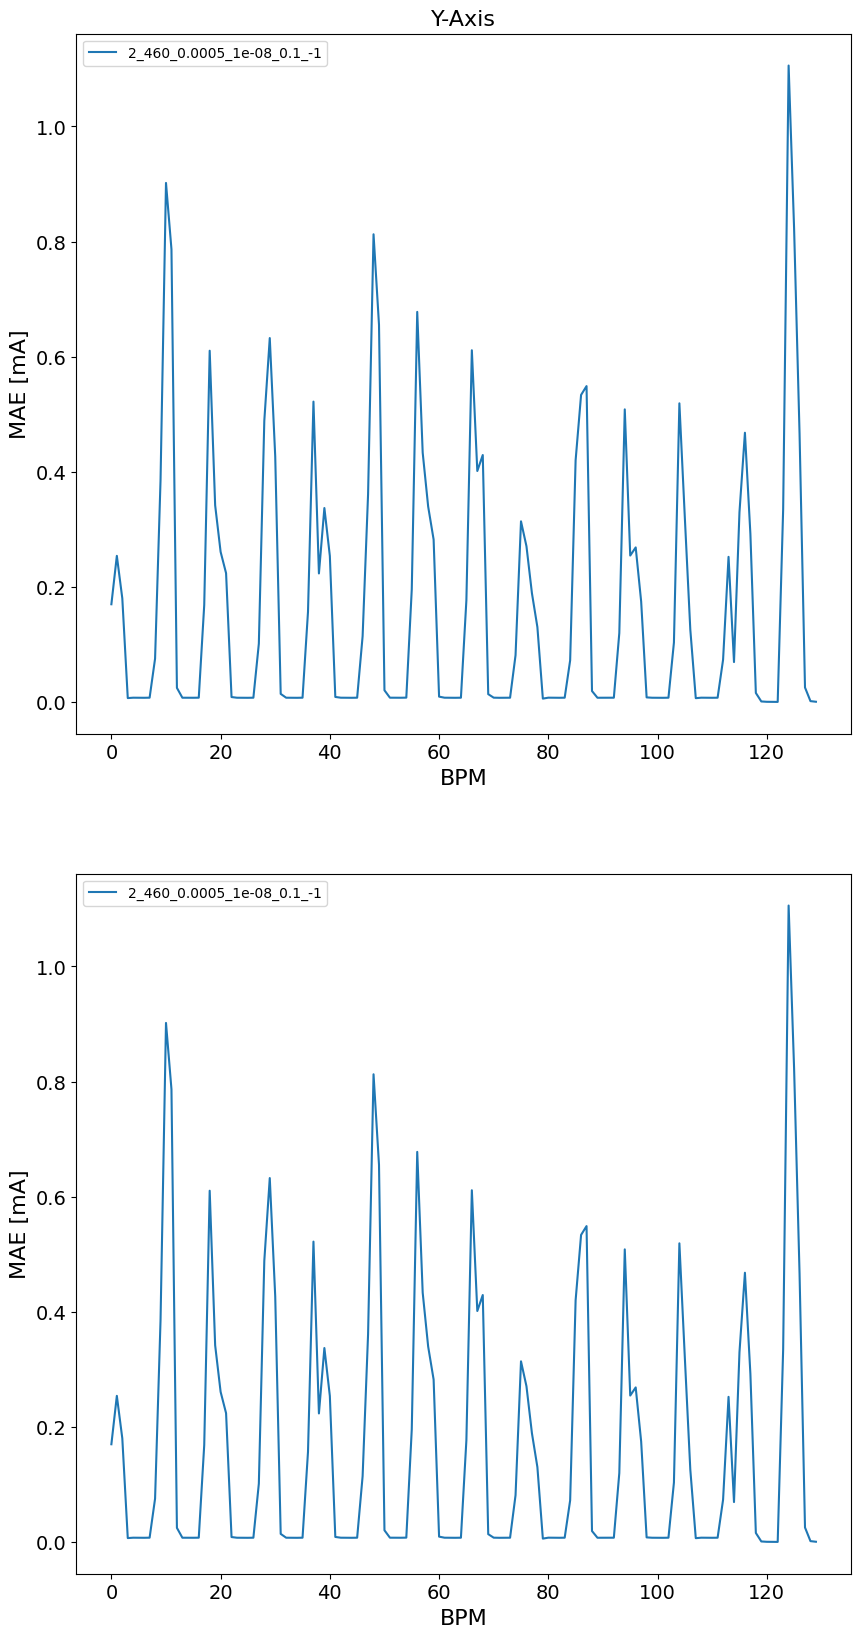

In [204]:
fig,axs=plt.subplots(2,figsize=(10,20))
for i in results:
    data = i['data']*1e3
    axs[0].plot(data[:130],label=i['label'])
    axs[1].plot(data[:130], label = i['label'])

axs[0].set_title("X-Axis")
axs[0].set_title("Y-Axis")
for ax in axs:
    ax.set_xlabel("BPM")
    ax.set_ylabel("MAE [mA]")
    ax.legend()
    

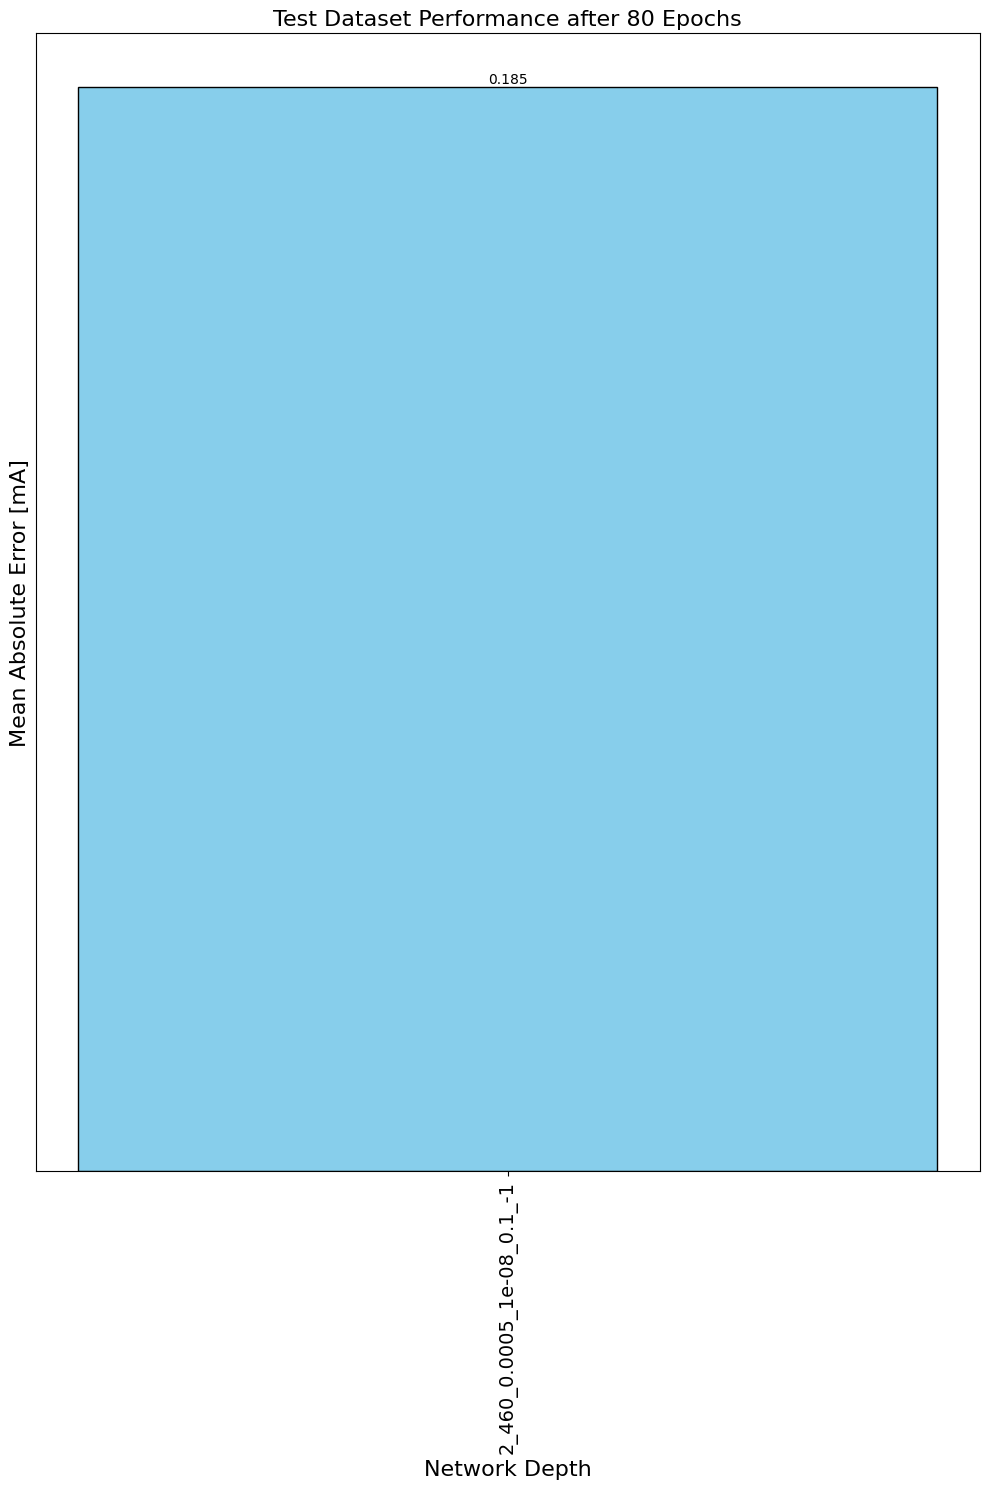

In [205]:
fig,ax=plt.subplots(1,figsize=(10,15),tight_layout=True)
values = [i['value']*1e3 for i in results]
label = "{}"
#labels = range(1,11)
labels = [i['label'].split("_")[-2]+"-"+i['label'].split("_")[-1] for i in results]
labels = [i['label'] for i in results]
bars = ax.bar(labels, values,color="skyblue", edgecolor="black")
ax.bar_label(bars, fmt='%.3f', padding=1)  # Add value labels on top of the bars
ax.set_yticks([])
ax.set_xlabel("Network Depth")
ax.set_ylabel("Mean Absolute Error [mA]")
ax.set_title("Test Dataset Performance after 80 Epochs")
ax.tick_params(axis='x', labelrotation=90)
#plt.savefig("figures/test_tune_80/test_tune_bars.png")

In [21]:
results = []
for i in range(1, 7):
    model_path = path + f"/{i}/my_model_try.keras"
    model = tf.keras.models.load_model(model_path)

    value = tf.reduce_sum([tf.size(variable).numpy() for variable in model.trainable_variables])
    print(value)
    results.append({'value': value, 'depth': i})

ValueError: File not found: filepath=/home/guney/PycharmProjects/Summerproject/out/out/2024-07-17-142337//1/my_model_try.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
values = [val['value'] for val in results]
plt.plot(values)

In [ ]:
model = tf.keras.models.load_model(path+"my_model_try.keras")
model.summary()

In [ ]:
inference =model.predict(input)
inference = scaling_reverse(inference,corr_min,corr_max,0,1)

In [ ]:
np.mean(np.abs(inference-output))

In [ ]:

metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()

In [ ]:
inputcut =np.copy(input)
inputcut[:,20] = -5

In [ ]:
 inference = model.predict(inputcut)
inference = scaling_reverse(inference, corr_min, corr_max, 0, 1)

In [ ]:
np.mean(np.abs(inference - output))

In [ ]:
metric = RSquaredSeparated()
r2 = metric.call(output, inference).numpy()
r2 = pd.Series(data=r2, index=output_df.columns)
r2 = np.round(r2, decimals=5)
r2 = pd.DataFrame(r2).T
plt.figure(figsize=(10 ,6))
plt.plot(r2.iloc[0] ,'*')
plt.xticks(ticks=np.arange(0, len(r2[:].T) ,5) ,labels=r2.keys()[0::5], rotation=90)
plt.show()